# Preparação do estado de bit-flip

In [1]:
from sympy import cos, sin, sqrt, pi, Matrix, Symbol, exp, print_latex, simplify
#from sympy.physics.quantum import TensorProduct, Dagger
import numpy as np
from numpy import linspace
#import matplotlib.pyplot as plt
#import math
from theoric.tools import *
#import torch
from torch import tensor

theta = Symbol('theta',real=True)
phi = Symbol('phi',real=True)
gamma = Symbol('gamma',real=True, positive=True)
p = Symbol('p',real=True, positive=True)



def calculated_rho_AB(theta, phi, p):
    state = Matrix([[(sqrt(1-p)*cos(theta/2)),
                    (sqrt(p)*exp(1j*phi)*sin(theta/2)),
                    (sqrt(1-p)*exp(1j*phi)*sin(theta/2)),
                    sqrt(p)*cos(theta/2)]])
    M_numpy = np.array(state.tolist(), dtype=np.complex64)
    return M_numpy
    #return state

def get_target_op(func_estado):
    state1 = simplify(func_estado)
    state2 = np.zeros(4,dtype=complex)
    aux = 0
    for i in state1[0]:
        state2[aux] = i
        aux += 1
    target_op = np.outer(state2.conj(), state2)
    target_op = tensor(target_op)
    return target_op

#state = calculated_rho_AB(theta, phi, p)
state = calculated_rho_AB(pi/2, 0, 0)
state

array([[0.70710677+0.j, 0.        +0.j, 0.70710677+0.j, 0.        +0.j]],
      dtype=complex64)

In [2]:
a = get_target_op(calculated_rho_AB(pi/2, 0, 1))
a


tensor([[0.0000+0.j, 0.0000+0.j, 0.0000+0.j, 0.0000+0.j],
        [0.0000+0.j, 0.5000+0.j, 0.0000+0.j, 0.5000+0.j],
        [0.0000+0.j, 0.0000+0.j, 0.0000+0.j, 0.0000+0.j],
        [0.0000+0.j, 0.5000+0.j, 0.0000+0.j, 0.5000+0.j]],
       dtype=torch.complex128)

In [9]:
'''                                  ReadMe                                                      '''
'''# Nessa célula vamos apenas mudar a função geradora do estado a ser preparado                 '''
'''# Basta alterar a função que gera o estado, nesse caso target_op = init_state_ref(n_qubits, p)'''

from src.vqa_tools import general_vqacircuit_penny 
from src.generalize import *
from torch import tensor
from numpy import sin,cos,sqrt,outer,zeros, pi
import cmath
import pickle
from theoric.bf_theoric import *

def run_calcs(list_p, epochs):
    coerencias_R = []
    coerencias_L = []
    pretrain = True
    save = True
    count = 0
    n_qubits = 2
    depht = 3
    _, params, _, _ = start_things(n_qubits, depht)
    for p in list_p:
        print(f'{count} de {len(list_p)}')
        count += 1
        circuit, _ = general_vqacircuit_penny(params, n_qubits, depht)

        # defina o estado a ser preparado abaixo
        #------------------------------------------------------------
        #target_op = bpf(pi/2, 0, p)
        target_op = get_target_op(calculated_rho_AB(pi/2, pi/2, p))
        #------------------------------------------------------------
    
        qc, qr, params = optmize(epochs, n_qubits, circuit, params, target_op, pretrain, 50)
        pretrain = False
        rho = tomograph(qc, qr)
        print(rho)
        coerencias_L, coerencias_R = results(rho, coerencias_R, coerencias_L)
    if save:
        mylist = [coerencias_L, coerencias_R]
        with open('data/bf/bf-coherences.pkl', 'wb') as f:
            pickle.dump(mylist, f)
        with open('data/bf/bf-best_params.pkl', 'wb') as f:
            pickle.dump(params, f)
    plot_theoric_bf(list_p)
    plots(list_p, coerencias_R, coerencias_L)
    #save = [list_p, coerencias_R, coerencias_L]
    #with open('data/BPFlist_p-coerencias_R-coerencias_L.pkl', 'wb') as f:
    #    pickle.dump(save, f)
    

0 de 21
[[ 5.19377239e-01+0.00000000e+00j  8.21096357e-03+4.96113116e-01j
   1.14127679e-02+2.32011000e-02j  2.01548426e-02-1.84524207e-03j]
 [ 8.21096357e-03-4.96113116e-01j  4.76985124e-01+0.00000000e+00j
   2.30400037e-02-1.19283347e-02j -4.37907259e-06-1.89230875e-02j]
 [ 1.14127679e-02-2.32011000e-02j  2.30400037e-02+1.19283347e-02j
   2.10656416e-03+0.00000000e+00j  5.30918936e-04-1.79811819e-04j]
 [ 2.01548426e-02+1.84524207e-03j -4.37907259e-06+1.89230875e-02j
   5.30918936e-04+1.79811819e-04j  1.53107283e-03+0.00000000e+00j]]
1 de 21
[[ 0.4970691 +0.j          0.02941531+0.47298756j  0.00097613+0.10832417j
   0.11140822-0.0146595j ]
 [ 0.02941531-0.47298756j  0.45315621+0.j          0.10332858+0.00473796j
  -0.00681045-0.10724828j]
 [ 0.00097613-0.10832417j  0.10332858-0.00473796j  0.0240485 +0.j
  -0.00269191-0.0240588j ]
 [ 0.11140822+0.0146595j  -0.00681045+0.10724828j -0.00269191+0.0240588j
   0.0257262 +0.j        ]]
2 de 21
[[ 0.4646898 +0.j         -0.00124302+0.4392142

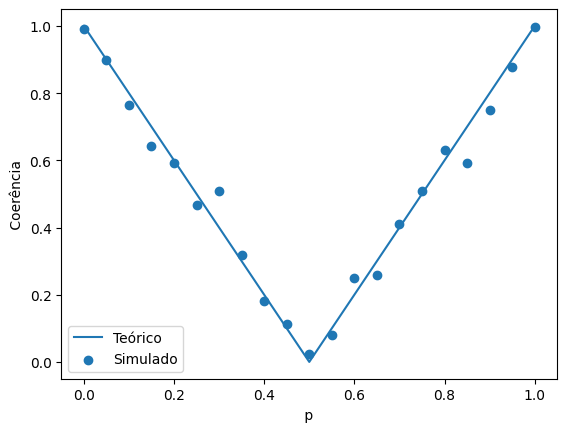

In [10]:
list_p = np.linspace(0,1,21)
run_calcs(list_p, 85)

In [14]:
'''                                  ReadMe                                                      '''
'''# Nessa célula vamos apenas mudar a função geradora do estado a ser preparado                 '''
'''# Basta alterar a função que gera o estado, nesse caso target_op = init_state_ref(n_qubits, p)'''

from src.vqa_tools import general_vqacircuit_penny 
from src.generalize import *
from torch import tensor
from numpy import sin,cos,sqrt,outer,zeros, pi
import cmath
import pickle
from theoric.bf_theoric import *

def run_calcs(list_p, epochs):
    coerencias_R = []
    coerencias_L = []
    pretrain = True
    save = False
    count = 0
    n_qubits = 2
    depht = 3
    _, params, _, _ = start_things(n_qubits, depht)
    for p in list_p:
        print(f'{count} de {len(list_p)}')
        count += 1
        circuit, _ = general_vqacircuit_penny(params, n_qubits, depht)
        if p == 0.15 or p == 0.85:
            _, params, _, _ = start_things(n_qubits, depht)
            target_op = get_target_op(calculated_rho_AB(pi/2, pi/2, p))
            qc, qr, params = optmize(epochs, n_qubits, circuit, params, target_op, pretrain, 50)
        # defina o estado a ser preparado abaixo
        #------------------------------------------------------------
        #target_op = bpf(pi/2, 0, p)
        else:
            target_op = get_target_op(calculated_rho_AB(pi/2, pi/2, p))
            qc, qr, params = optmize(epochs, n_qubits, circuit, params, target_op, pretrain, 50)
        #------------------------------------------------------------
    
        
        pretrain = False
        rho = tomograph(qc, qr)
        print(rho)
        coerencias_L, coerencias_R = results(rho, coerencias_R, coerencias_L)
    if save:
        mylist = [coerencias_L, coerencias_R]
        with open('data/bf/bf-coherences.pkl', 'wb') as f:
            pickle.dump(mylist, f)
        with open('data/bf/bf-best_params.pkl', 'wb') as f:
            pickle.dump(params, f)
    plot_theoric_bf(list_p)
    plots(list_p, coerencias_R, coerencias_L)
    #save = [list_p, coerencias_R, coerencias_L]
    #with open('data/BPFlist_p-coerencias_R-coerencias_L.pkl', 'wb') as f:
    #    pickle.dump(save, f)
    

0 de 21
[[ 4.94246994e-01+0.j          8.01786108e-03+0.49566472j
   1.74120457e-02+0.00835694j -8.40407573e-03+0.02509903j]
 [ 8.01786108e-03-0.49566472j  5.01488617e-01+0.j
   1.04976315e-02-0.01637579j  2.43300227e-02+0.01087817j]
 [ 1.74120457e-02-0.00835694j  1.04976315e-02+0.01637579j
   1.75381942e-03+0.j          2.80331606e-04+0.00206024j]
 [-8.40407573e-03-0.02509903j  2.43300227e-02-0.01087817j
   2.80331606e-04-0.00206024j  2.51056895e-03+0.j        ]]
1 de 21
[[0.47981382+0.j         0.02401423+0.47305674j 0.01017425+0.10812436j
  0.10008788+0.01663776j]
 [0.02401423-0.47305674j 0.47193158+0.j         0.10512857-0.00451751j
  0.02140059-0.1002282j ]
 [0.01017425-0.10812436j 0.10512857+0.00451751j 0.02549009+0.j
  0.00582113-0.02111185j]
 [0.10008788-0.01663776j 0.02140059+0.1002282j  0.00582113+0.02111185j
  0.0227645 +0.j        ]]
2 de 21
[[0.47332646+0.00000000e+00j 0.01099247+4.47594330e-01j
  0.00193447+1.50112102e-01j 0.15677967-3.52379460e-05j]
 [0.01099247-4.475943

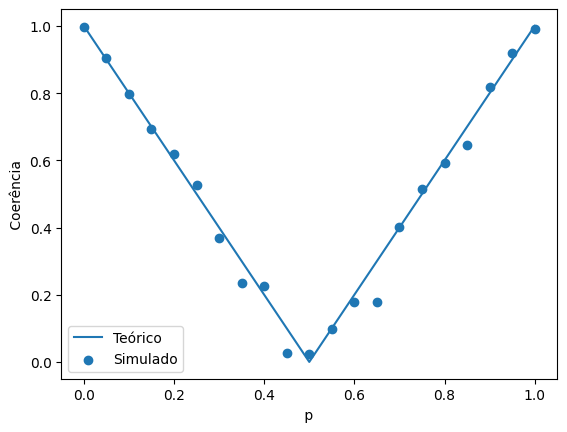

In [16]:
list_p = np.linspace(0,1,21)
list_p
run_calcs(list_p, 85)

In [1]:
from theoric.bf_theoric import *

a = theoric_rho_A_bf(theta,phi,p)
a
#plt.show()

Matrix([[p*sin(theta/2)**2 + (1 - p)*cos(theta/2)**2, (2.0*I*p*sin(phi) + exp(-1.0*I*phi))*sin(theta/2)*cos(theta/2)], [(-2.0*I*p*sin(phi) + exp(1.0*I*phi))*sin(theta/2)*cos(theta/2), p*cos(theta/2)**2 + (1 - p)*sin(theta/2)**2]])


Matrix([
[                   p*sin(theta/2)**2 + (1 - p)*cos(theta/2)**2, (2.0*I*p*sin(phi) + exp(-1.0*I*phi))*sin(theta/2)*cos(theta/2)],
[(-2.0*I*p*sin(phi) + exp(1.0*I*phi))*sin(theta/2)*cos(theta/2),                    p*cos(theta/2)**2 + (1 - p)*sin(theta/2)**2]])

(2, 21)
[0.9942813046768506, 0.8919415317249151, 0.790960534572855, 0.6829335001116109, 0.6355435641402459, 0.47931582051195676, 0.41257091761957876, 0.3209937954490334, 0.21876622362901926, 0.07182892337515089, 0.06682305541384989, 0.18280155112573948, 0.18147270050394324, 0.3075818315768039, 0.4502199008874097, 0.4412880453769122, 0.587198898460232, 0.666250448915245, 0.7492812496840455, 0.9135161950802383, 0.9981958109625721]


<function matplotlib.pyplot.show(close=None, block=None)>

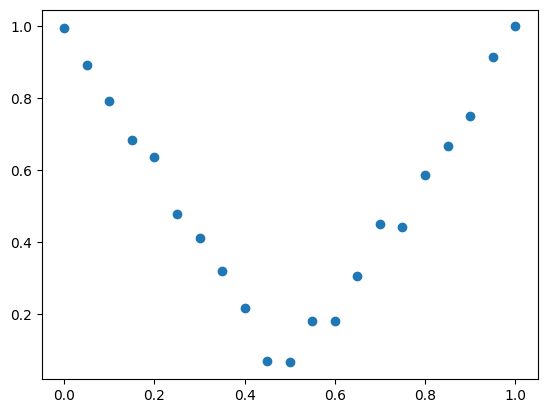

In [13]:
import pickle
with open('data/bf/bf-coherences.pkl', 'rb') as f:
    cohs = pickle.load(f)
print(np.shape(cohs))
print(cohs[0])
x = np.linspace(0,1,len(cohs[0]))
plt.scatter(x,cohs[0])
plt.show

In [7]:
import pickle
with open('data/bf/bf-best_params.pkl', 'rb') as f:
    params = pickle.load(f)
print(np.shape(params))
print(cohs[0])

torch.Size([24])
tensor(-2.3212, dtype=torch.float64, grad_fn=<SelectBackward0>)


0 de 21
[[ 0.41377111+0.j          0.41665125-0.1196129j  -0.06496887-0.18635655j
   0.08264048-0.08688905j]
 [ 0.41665125+0.1196129j   0.45463556+0.j         -0.01214002-0.20708669j
   0.1087507 -0.06425511j]
 [-0.06496887+0.18635655j -0.01214002+0.20708669j  0.09566163+0.j
   0.02650879+0.05215934j]
 [ 0.08264048+0.08688905j  0.1087507 +0.06425511j  0.02650879-0.05215934j
   0.0359317 +0.j        ]]
1 de 21
[[ 0.51861851+0.j          0.47449555+0.03059113j  0.07030246+0.07856922j
  -0.09359288-0.01748334j]
 [ 0.47449555-0.03059113j  0.43932605+0.j          0.06842165+0.07075668j
  -0.08769581-0.01002619j]
 [ 0.07030246-0.07856922j  0.06842165-0.07075668j  0.02420123+0.j
  -0.01477387+0.01265812j]
 [-0.09359288+0.01748334j -0.08769581+0.01002619j -0.01477387-0.01265812j
   0.01785421+0.j        ]]
2 de 21
[[ 0.61333791+0.j          0.42722443+0.01930061j  0.16000353-0.04332652j
  -0.14312   +0.05365j   ]
 [ 0.42722443-0.01930061j  0.30146944+0.j          0.10988326-0.03320023j
  -0.09

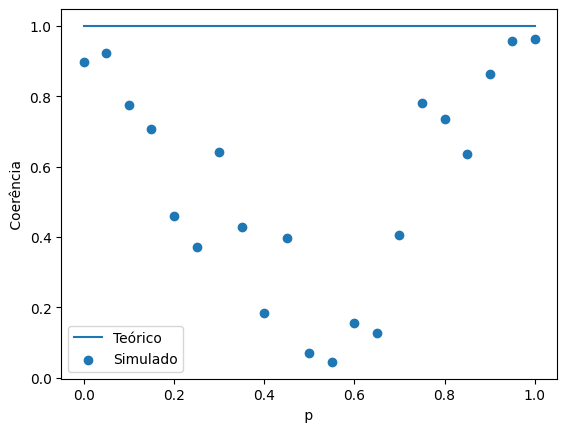

In [12]:
import pickle
from src.vqa_tools import general_vqacircuit_penny 
from src.generalize import *

list_p = np.linspace(0,1,21)
epochs = 10
coerencias_R = []
coerencias_L = []
pretrain = True
count = 0
n_qubits = 2
depht = 3

#------------------------------------------------------------
#_, params, _, _ = start_things(n_qubits, depht)# random start
with open('data/bf/bf-best_params.pkl', 'rb') as f:# start the last otimized params
    params = pickle.load(f)
#------------------------------------------------------------

for p in list_p:
    print(f'{count} de {len(list_p)}')
    count += 1
    circuit, _ = general_vqacircuit_penny(params, n_qubits, depht)
    # defina o estado a ser preparado abaixo
    #------------------------------------------------------------
    #target_op = bpf(pi/2, 0, p)
    target_op = get_target_op(calculated_rho_AB(pi/2, 0, p))
    #------------------------------------------------------------

    pretrain = False
    qc, qr, params = optmize(epochs, n_qubits, circuit, params, target_op, pretrain, 120)
    rho = tomograph(qc, qr)
    print(rho)
    coerencias_L, coerencias_R = results(rho, coerencias_R, coerencias_L)
mylist = [coerencias_L, coerencias_R]
with open('data/bf/bf-coherences-postrain.pkl', 'wb') as f:
    pickle.dump(mylist, f)
with open('data/bf/bf-best_params-postrain.pkl', 'wb') as f:
    pickle.dump(params, f)
plot_theoric_bf(list_p)
plots(list_p, coerencias_R, coerencias_L)

In [ ]:
list_p = np.linspace(0,1,21)
run_calcs(list_p, 10)